## Solutions

### Exercise 1

Here’s one solution (assuming as usual that you’ve executed everything above)

In [14]:
def simulate_og(σ_func, og, α, y0=0.1, ts_length=100):
    '''
    Compute a time series given consumption policy σ.
    '''
    y = np.empty(ts_length)
    ξ = np.random.randn(ts_length-1)
    y[0] = y0
    for t in range(ts_length-1):
        y[t+1] = (y[t] - σ_func(y[t]))**α * np.exp(og.μ + og.s * ξ[t])
    return y

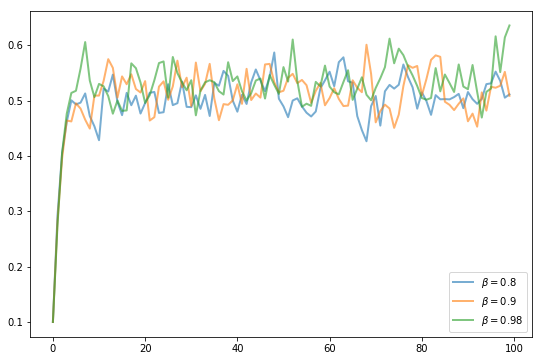

In [15]:
fig, ax = plt.subplots(figsize=(9, 6))

for β in (0.8, 0.9, 0.98):

    og = OptimalGrowthModel(f, np.log, β=β, s=0.05)
    grid = og.grid

    v_solution = solve_model(og, verbose=False)

    σ_star = get_greedy(v_solution)
    σ_func = lambda x: interp(grid, σ_star, x)  # Define an optimal policy function
    y = simulate_og(σ_func, og, α)
    ax.plot(y, lw=2, alpha=0.6, label=rf'$\beta = {β}$')

ax.legend(loc='lower right')
plt.show()